## **Predicting Banana Quality using Machine Learning**

#### This notebook will introduce some foundation machine learning and data science concepts by exploring the quality of bananas **classification.** It is intended to be an end-to-end example of what a data science and machine learning **proof of concept** might look like.

### **What is classification?**

####  Classification involves deciding whether a sample is part of one class or another (**single-class classification**). If there are multiple class options, it's referred to as **multi-class classification.**

### **Steps Machine Learning Modelling Framework**

#### More specifically, we'll look at the following topics.
#### &emsp; • **Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.
#### &emsp; • **Model training** - create model(s) to learn to predict a target variable based on other variables.
#### &emsp; • **Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics.
#### &emsp; • **Model comparison** - comparing several different models to find the best one.
#### &emsp; • **Model fine-tuning** - once we've found a good model, how can we improve it?
#### &emsp; • **Feature importance** - since we're predicting the quality of the bananas, are there some things which are more important for prediction?
#### &emsp; • **Cross-validation** - if we do build a good model, can we be sure it will work on unseen data?
#### &emsp; • **Reporting what we've found** - if we had to present our work, what would we show someone?
#### To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks

### **1. About the dataset**

#### The tabular dataset holds numerical attributes describing the quality of bananas, including their size, weight, sweetness (Brix), acidity (pH), softness, harvest time, and ripeness. 

### **2. Dataset Columns**

#### &emsp; **Size** - Size of bananas in cm
#### &emsp; **Weight** - Weight of bananas in gr
#### &emsp; **Sweetness** - Sweetness level in Brix
#### &emsp; **Softness** - Softness of fruit
#### &emsp; **HarvestTime** - Amount of time for harvesting the fruit
#### &emsp; **Ripeness** - Ripeness of fruit
#### &emsp; **Acidity** - Acidity level (pH)
#### &emsp; **Quality** - Quality of fruit

### **3. Evaluation**

#### The evaluation metric is something you might define at the start of a project. 
#### Since machine learning is very experimental, you might say something like, if we can reach **95% accuracy** at predicting whether or not a banana has good quality during the proof of concept, we'll pursure this project.
#### The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.
#### However, due to the nature of experimentation, the evaluation metric may change over time.

### **4. Importing Libraries**

In [41]:
import pandas as pd
import numpy as np
import random
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### **5. Loading Data**

In [42]:
bananaData = pd.read_csv("Dataset/banana_quality.csv")
print("Dimension of the dataset:", bananaData.shape)

Dimension of the dataset: (8000, 8)


#### The dataset holds 8000 sample distributed in the following features: Size, 		Weight, Sweetness, Softness, Harvest Time, Ripeness, Acidity, and Quality.

### **6. Exploratory data analysis (EDA)**

####  Once you've imported a dataset, the next step is to explore. There's no set way of doing this. But what you should be trying to do is become more and more familiar with the dataset.
#### Compare different columns to each other, compare them to the target variable. Refer back to your data dictionary and remind yourself of what different columns mean.
#### Once of the quickest and easiest ways to check your data is with the head() function. Calling it on any dataframe will print the top 5 rows, tail() calls the bottom 5. You can also pass a number to them like head(10) to show the top 10 rows.

#### **Getting the columns and data types**

In [43]:
bananaData.columns

Index(['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [44]:
bananaData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


#### **Top and bottom 10 records**

In [45]:
bananaData.head(10)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good
5,-2.807722,1.138136,3.447627,-1.713302,-2.220912,2.079410,2.281203,Good
6,-0.230208,2.783471,1.681184,-0.529779,-1.958468,1.348143,2.181766,Good
7,-1.348515,3.232281,4.011817,-0.890606,-0.031994,2.395917,1.042878,Good
8,-2.012226,1.928034,0.698746,-0.959772,-1.349721,1.311802,1.048762,Good
9,0.053035,1.309993,-0.264139,-2.969297,0.303983,3.889359,1.931332,Good


In [46]:
bananaData.tail(10)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
7990,-1.468650,0.258104,-1.733331,0.939175,0.302571,-1.382287,3.830090,Bad
7991,-4.559045,-0.449785,1.895221,2.126339,-4.577347,2.585295,1.015110,Bad
7992,-3.901210,0.364839,2.004397,1.809546,-1.106952,-1.586317,1.896975,Bad
7993,-0.908573,0.303526,-1.448441,1.275473,0.311950,-1.815395,2.371496,Bad
7994,-1.409043,0.126115,-2.169534,1.711242,0.115379,-1.146596,2.834771,Bad
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad
7999,-2.660879,-2.044666,0.159026,1.499706,-1.581856,-1.605859,1.435644,Bad


#### **Statistical description**

In [47]:
bananaData.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,8000.0,-0.747802,2.136023,-7.998074,-2.277651,-0.897514,0.654216,7.970800
Weight,8000.0,-0.761019,2.015934,-8.283002,-2.223574,-0.868659,0.775491,5.679692
Sweetness,8000.0,-0.770224,1.948455,-6.434022,-2.107329,-1.020673,0.311048,7.539374
Softness,8000.0,-0.014441,2.065216,-6.959320,-1.590458,0.202644,1.547120,8.241555
HarvestTime,8000.0,-0.751288,1.996661,-7.570008,-2.120659,-0.934192,0.507326,6.293280
Ripeness,8000.0,0.781098,2.114289,-7.423155,-0.574226,0.964952,2.261650,7.249034
Acidity,8000.0,0.008725,2.293467,-8.226977,-1.629450,0.098735,1.682063,7.411633


#### **Observing null and duplicated values**

In [48]:
bananaData.isna().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [49]:
bananaData.duplicated().sum()

0

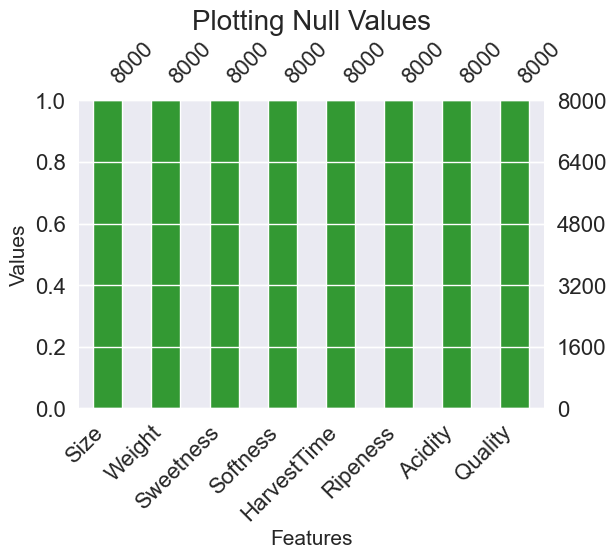

In [50]:
sns.set(style="darkgrid", palette="deep")
plt.title("Plotting Null Values", fontsize=20)
plt.xlabel("Features", fontsize=15)
plt.ylabel("Values", fontsize=15)
msno.bar(bananaData, figsize=(6,4), color=(0.20,0.60,0.20))
plt.show()

##### In our case, there are no missing values and all of our columns are numerical except from quality.

#### **Selecting the features and target**

In [51]:
features = ['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness', 'Acidity']
target = 'Quality'

In [52]:
print("Target Data Distribution")
bananaData[target].value_counts()

Target Data Distribution


Quality
Good    4006
Bad     3994
Name: count, dtype: int64

#### **Target Data Distribution**

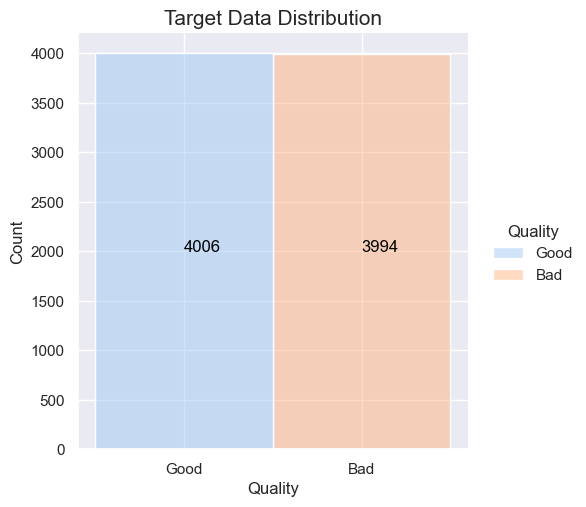

In [53]:
sns.set(style="darkgrid", palette="pastel")
sns.displot(data=bananaData, x="Quality", hue="Quality")

plt.title("Target Data Distribution", fontsize=15)
annot = bananaData[target].value_counts()
for index, value in enumerate(annot):
    plt.text(x=index, y=2000, s=value, color="black")

plt.grid(True)
plt.show()

##### Our target column can be considered **balanced** due to is closed to even.

#### **Analysing the features**

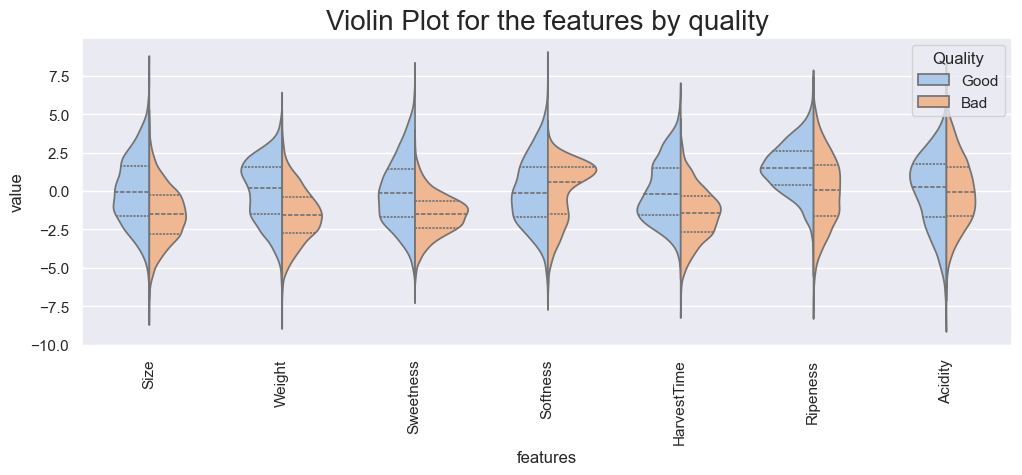

In [54]:
# Scatter Plot | to Show Size vs Sweetness RealtionShip
sns.set(style="darkgrid", palette="pastel")
plt.figure(figsize=(12,4))
plt.title("Violin Plot for the features by quality", fontsize=20)
plot_data = pd.melt(bananaData, id_vars="Quality", var_name="features", value_name="value")
sns.violinplot(data=plot_data, x="features", y="value", hue="Quality", split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

##### At first glance, we can observe the banana quality is barely affected by acidity. We can observe that "good" and "bad" quality by acidity is almost balanced which does not represent a variable to determine the quality itself.

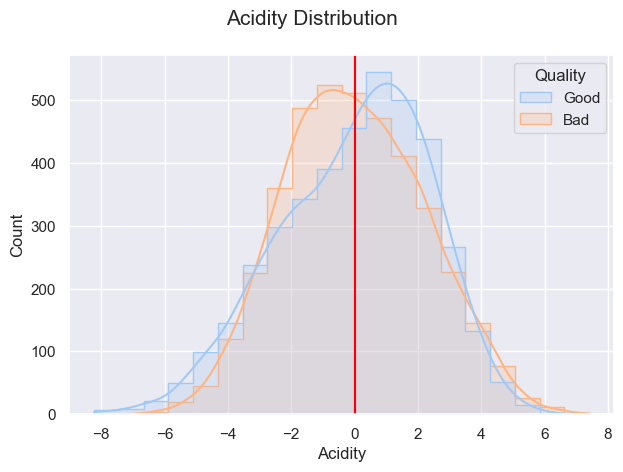

In [55]:
sns.set(style="darkgrid", palette="pastel")
sns.histplot(x=bananaData['Acidity'], hue=bananaData['Quality'], element="step", kde=True, bins=20)
plt.axvline(x=bananaData.query("Quality =='Good'")['Acidity'].mean(), color="blue")
plt.axvline(x=bananaData.query("Quality == 'Bad'")['Acidity'].mean(), color="red")
plt.suptitle("Acidity Distribution", fontsize=15)
plt.tight_layout()
plt.show()

##### Nevertheless the sweetness and softness can be variables to determine a good or bad quality in the bananas. Let's plot the these variables to get insights and analyse the results.

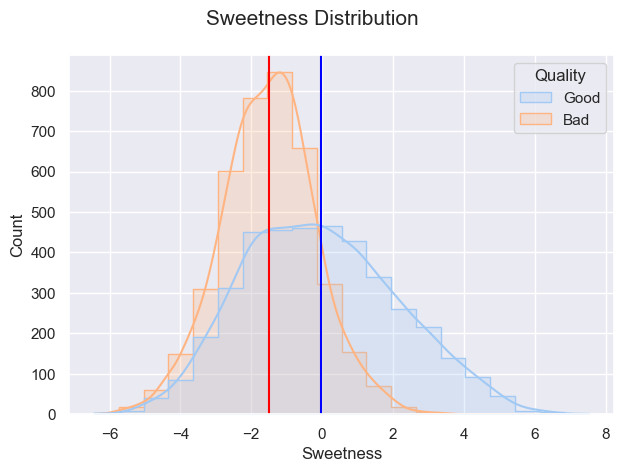

In [56]:
sns.set(style="darkgrid", palette="pastel")
sns.histplot(x=bananaData['Sweetness'], hue=bananaData['Quality'], element="step", kde=True, bins=20)
plt.axvline(x=bananaData.query("Quality =='Good'")['Sweetness'].mean(), color="blue")
plt.axvline(x=bananaData.query("Quality == 'Bad'")['Sweetness'].mean(), color="red")
plt.suptitle("Sweetness Distribution", fontsize=15)
plt.tight_layout()
plt.show()

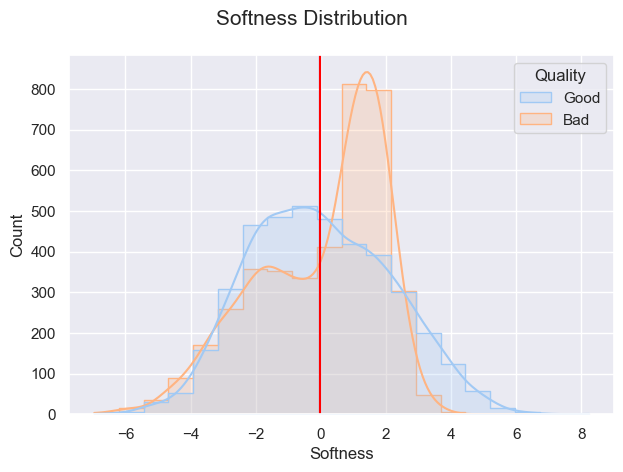

In [57]:
sns.set(style="darkgrid", palette="pastel")
sns.histplot(x=bananaData['Softness'], hue=bananaData['Quality'], element="step", kde=True, bins=20)
plt.axvline(x=bananaData.query("Quality =='Good'")['Softness'].mean(), color="blue")
plt.axvline(x=bananaData.query("Quality == 'Bad'")['Softness'].mean(), color="red")
plt.suptitle("Softness Distribution", fontsize=15)
plt.tight_layout()
plt.show()

##### Analysing the results we observe that a softer banana tends to get a bad quality and on the other hand the sweeter the banana is the better quality it gets.

##### Let's plot the size, weight and ripeness variables to see what we can get.

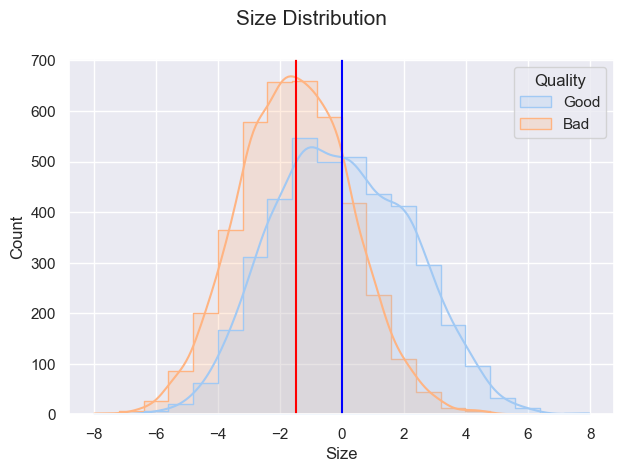

In [58]:
sns.set(style="darkgrid", palette="pastel")
sns.histplot(x=bananaData['Size'], hue=bananaData['Quality'], element="step", kde=True, bins=20)
plt.axvline(x=bananaData.query("Quality =='Good'")['Size'].mean(), color="blue")
plt.axvline(x=bananaData.query("Quality == 'Bad'")['Size'].mean(), color="red")
plt.suptitle("Size Distribution", fontsize=15)
plt.tight_layout()
plt.show()

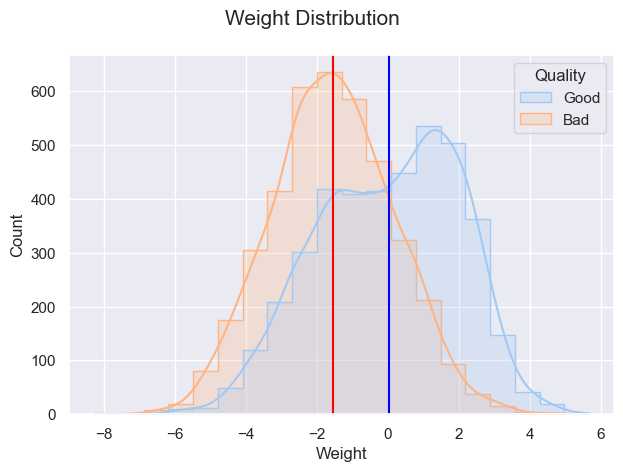

In [59]:
sns.set(style="darkgrid", palette="pastel")
sns.histplot(x=bananaData['Weight'], hue=bananaData['Quality'], element="step", kde=True, bins=20)
plt.axvline(x=bananaData.query("Quality == 'Good'")['Weight'].mean(), color="blue")
plt.axvline(x=bananaData.query("Quality == 'Bad'")['Weight'].mean(), color="red")
plt.suptitle("Weight Distribution", fontsize=15)
plt.tight_layout()
plt.show()

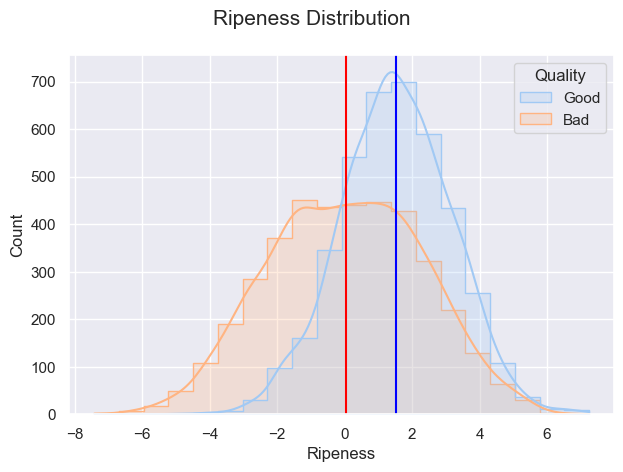

In [60]:
sns.set(style="darkgrid", palette="pastel")
sns.histplot(x=bananaData['Ripeness'], hue=bananaData['Quality'], element="step", kde=True, bins=20)
plt.axvline(x=bananaData.query("Quality =='Good'")['Ripeness'].mean(), color="blue")
plt.axvline(x=bananaData.query("Quality == 'Bad'")['Ripeness'].mean(), color="red")
plt.suptitle("Ripeness Distribution", fontsize=15)
plt.tight_layout()
plt.show()

#### **Correlation between independent variables**

In [61]:
# Find the correlation between our independent variables
corr_matrix = bananaData[features].corr()
corr_matrix

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
Size,1.000000,-0.181933,-0.258027,0.164526,0.582014,0.042587,-0.140673
Weight,-0.181933,1.000000,0.422683,-0.189908,-0.079465,-0.035276,0.443879
Sweetness,-0.258027,0.422683,1.000000,-0.095338,-0.201657,0.180095,0.187059
Softness,0.164526,-0.189908,-0.095338,1.000000,0.194734,-0.253804,-0.146014
HarvestTime,0.582014,-0.079465,-0.201657,0.194734,1.000000,0.107127,-0.090903
Ripeness,0.042587,-0.035276,0.180095,-0.253804,0.107127,1.000000,-0.351531
Acidity,-0.140673,0.443879,0.187059,-0.146014,-0.090903,-0.351531,1.000000


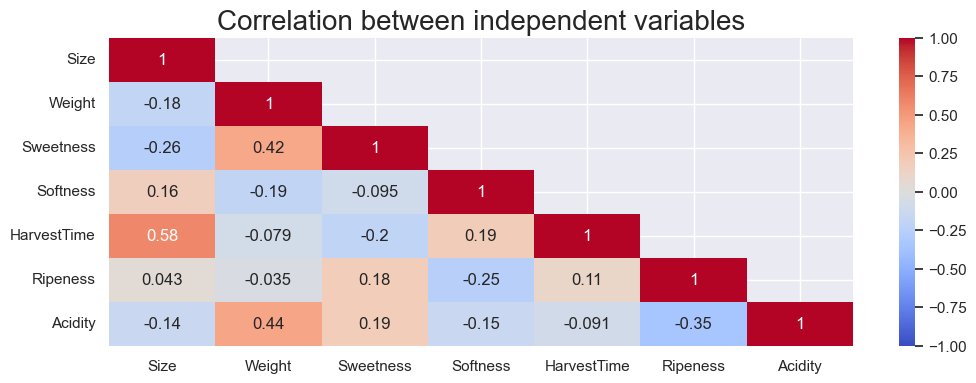

In [62]:
plt.figure(figsize=(12,4))
plt.title("Correlation between independent variables", fontsize=20)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
heatmap = sns.heatmap(corr_matrix, vmax=1, vmin=-1, mask=mask, annot=True, cmap='coolwarm')
plt.show()

##### A higher positive value means a potential positive correlation (**increase**) and a higher negative value means a potential negative correlation (**decrease**).

### **Data Preprocessing**

#### **Handling outliers**

In [63]:
x = bananaData.loc[:,features]
y = bananaData[target]

### **Scaling the features**

#### &emsp; PCA is affected by scale, so we need to scale the features in the data before applying PCA. we will apply the *StandardScaler()* from *sklearn.preprocessing*, this function to help us to scale the data set’s features onto unit scale (mean = 0 and variance = 1), which is a requirement for the best performance of many machine learning algorithms.

In [64]:
x_scaled = StandardScaler().fit_transform(x)
x_scaled.shape

(8000, 7)

In [65]:
print(x_scaled)

[[-0.55113643  0.60972933  1.97505067 ...  0.52395094  0.78256769
   0.11449116]
 [-0.77810662  0.61905159  0.57338529 ... -0.07058475  0.60849327
   0.13020408]
 [ 0.18268513  1.11329814  1.20034726 ...  0.05210072  1.09241877
   0.61857695]
 ...
 [ 1.01621574 -0.56882668 -0.90443461 ...  0.09462033 -1.237308
   0.30027865]
 [-0.64802151 -0.98302025 -0.12205536 ... -0.0257164  -2.06293293
   0.18089199]
 [-0.895682   -0.63679029  0.47694643 ... -0.41600452 -1.12903488
   0.62220587]]


### **Analysing how many principal components we need to choose for the analysis.**

#### &emsp; To know the number of principal components that we will need in the dataset we will apply PCA, using the explained variance ratio I can see the percentages of the variance in each principal component.

In [66]:
pca = PCA()
pca.fit_transform(x_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance_ratio)
explained_varianceDF = pd.DataFrame([explained_variance_ratio, cum_explained_variance], index=['Explained Variance', 'Cumulative'])
print(explained_varianceDF.T)

   Explained Variance  Cumulative
0            0.307998    0.307998
1            0.200044    0.508042
2            0.180337    0.688380
3            0.130734    0.819113
4            0.067806    0.886920
5            0.061447    0.948367
6            0.051633    1.000000


#### &emsp; The first component makes up for around 31% of the explained variance. This is relatively low because for this particular case I want to reduce the data’s dimensionality and keep at least 80% variance of the original data so then I must include three components to reach at least 80% and even have around 82% of explained variance covered for this case.

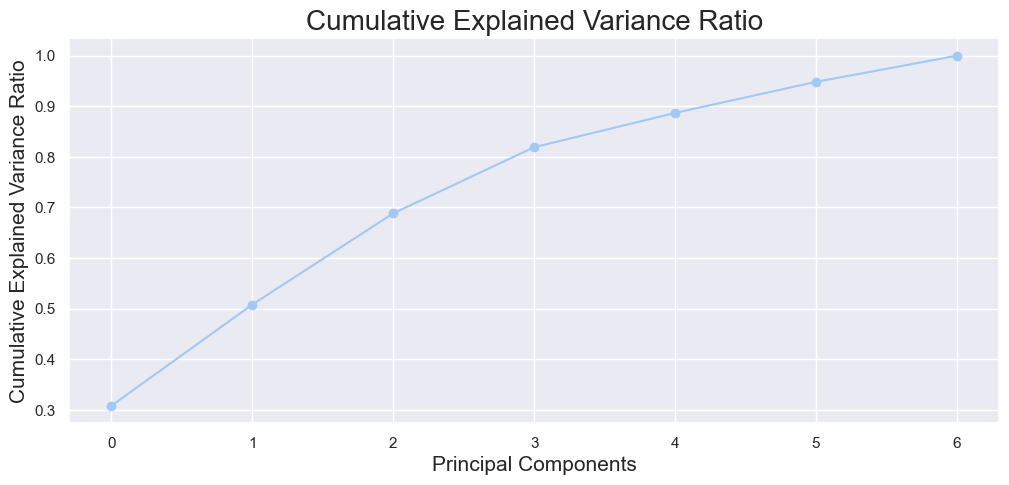

In [67]:
figure = plt.figure(figsize=(12,5))
ax = figure.add_subplot(1,1,1)
ax.set_title("Cumulative Explained Variance Ratio", fontsize=20)
ax.set_xlabel("Principal Components", fontsize=15)
ax.set_ylabel("Cumulative Explained Variance Ratio", fontsize=15)
ax.plot(cum_explained_variance, linestyle="-", marker="o")
ax.grid(True)

### **Applying PCA for three components**

In [68]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x_scaled)
principalComponentsDF = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])
principalComponentsDF

,PC1,PC2,PC3
0,1.330430,-1.002280,-1.316232
1,1.260413,-0.934781,-0.495969
2,1.425380,-0.917234,-1.690161
3,1.388760,-0.559406,-1.158999
4,1.086714,0.460326,-1.109329
...,...,...,...
7995,1.774965,0.991603,0.436885
7996,-0.619122,1.728019,0.776756
7997,-1.089930,1.438835,0.431576
7998,-0.279718,1.692000,1.594430


In [69]:
# Show PCA characteristics
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', principalComponentsDF.shape)

Shape before PCA:  (8000, 7)
Shape after PCA:  (8000, 3)


In [70]:
finalDF = pd.concat([principalComponentsDF, y.rename('Target')], axis=1)
finalDF

,PC1,PC2,PC3,Target
0,1.330430,-1.002280,-1.316232,Good
1,1.260413,-0.934781,-0.495969,Good
2,1.425380,-0.917234,-1.690161,Good
3,1.388760,-0.559406,-1.158999,Good
4,1.086714,0.460326,-1.109329,Good
...,...,...,...,...
7995,1.774965,0.991603,0.436885,Bad
7996,-0.619122,1.728019,0.776756,Bad
7997,-1.089930,1.438835,0.431576,Bad
7998,-0.279718,1.692000,1.594430,Bad


In [71]:
finalDF.shape

(8000, 4)

### **Visualising 3D projection for PCA**

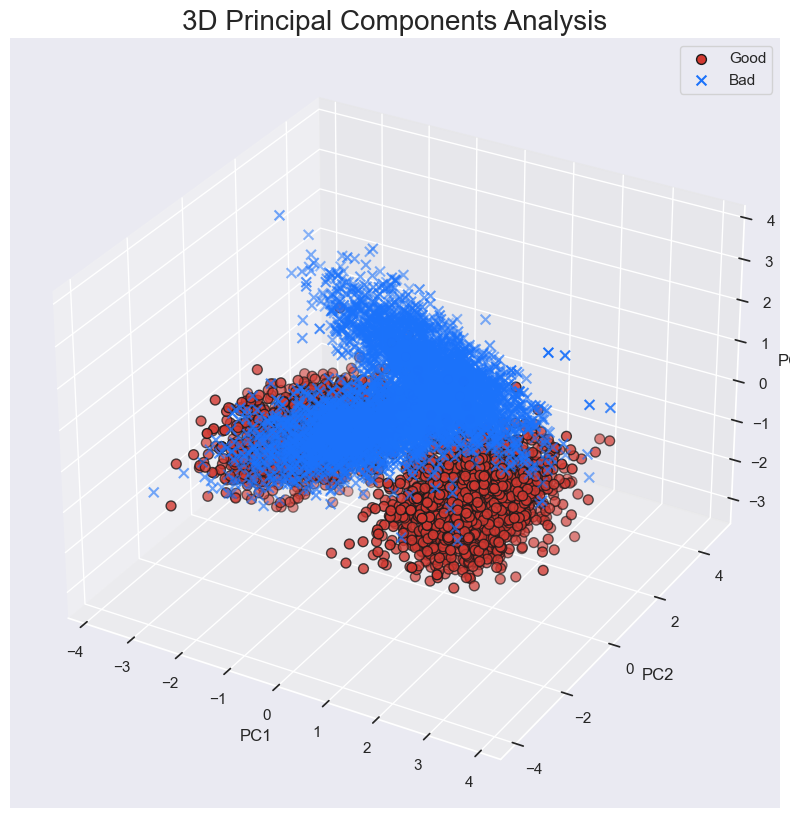

In [72]:
figure = plt.figure(figsize=(10,10))
ax = figure.add_subplot(111, projection='3d')
ax.set_title("3D Principal Components Analysis", fontsize=20)
ax.set_xlabel('PC1', fontsize=12)
ax.set_ylabel('PC2', fontsize=12)
ax.set_zlabel('PC3', fontsize=12)
targets = set(finalDF['Target'])
colours = ['#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for _ in range(len(targets))]

for target, colour in zip(targets, colours):
    indextokeep = finalDF['Target'] == target

    if target == "Good":
        ax.scatter(finalDF.loc[indextokeep,'PC1'],
                    finalDF.loc[indextokeep,'PC2'],
                    finalDF.loc[indextokeep,'PC3'],
                    s=50,
                    c=colour,
                    edgecolors='k',
                    marker='o')
    else:
        ax.scatter(finalDF.loc[indextokeep,'PC1'],
                    finalDF.loc[indextokeep,'PC2'],
                    finalDF.loc[indextokeep,'PC3'],
                    s=50,
                    c=colour,
                    marker='x')

ax.legend(targets)
ax.autoscale_view(60,40)
ax.grid(True)
plt.show()

#### &emsp; We can see that exits two different marked clusters in terms of the quality: the ‘good’ data which there is a part that is oriented to the PC2 and another one oriented to the PC1, nevertheless the ‘bad’ data is oriented to the centre above of the ‘good’ data taking an elevation in the z-axis corresponding to the PC3.

### **Computing PCA loadings and the loading matrix**

#### &emsp; To do this analysis we will take the concept of the loading matrix which show the contribution of each original feature to the principal components.
#### &emsp; **Positive or negative:** direction of the relationship. 
#### &emsp; **Higher absolute values:** stronger contribution to principal components.

In [73]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'])
loadings_df['Features'] = features
loadings_df = loadings_df.set_index('Features')
loadings_df

,PC1,PC2,PC3
Features,,,
Size,-0.682587,0.183361,-0.508922
Weight,0.660983,0.196600,-0.514312
Sweetness,0.613358,-0.204087,-0.338758
Softness,-0.412317,0.433966,0.194892
HarvestTime,-0.618015,0.180507,-0.629053
Ripeness,-0.087870,-0.841523,-0.359375
Acidity,0.563522,0.597902,-0.247793


In [74]:
loadings[:,0]

array([-0.68258677,  0.66098344,  0.61335819, -0.41231734, -0.61801529,
       -0.08787029,  0.5635219 ])

### **Visualising 2D Loading Matrix and Principal Components**

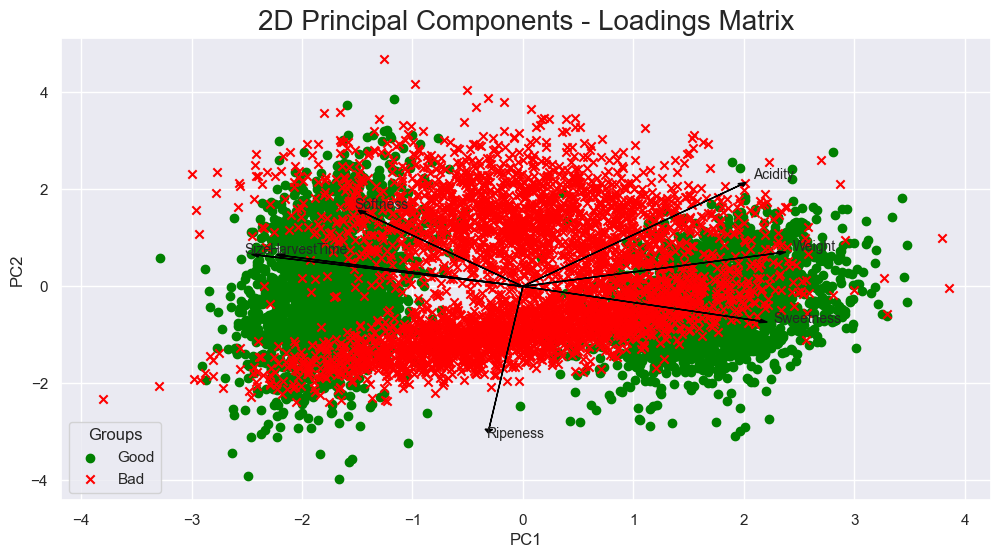

In [75]:
figure = plt.figure(figsize=(12,6))
ax = figure.add_subplot(1,1,1)
ax.set_title("2D Principal Components - Loadings Matrix", fontsize=20)
ax.set_xlabel('PC1', fontsize=12)
ax.set_ylabel('PC2', fontsize=12)
targets = set(finalDF['Target'])

for target in targets:
    indextokeep = finalDF['Target'] == target

    if target == "Good":
        ax.scatter(finalDF.loc[indextokeep,'PC1'],
                    finalDF.loc[indextokeep,'PC2'],
                    c='green',
                    marker='o')
    else:
        ax.scatter(finalDF.loc[indextokeep,'PC1'],
                    finalDF.loc[indextokeep,'PC2'],
                    c='red',
                    marker='x')

for i, values in enumerate(features):
        ax.arrow(
            0, 0, # coordinates of arrow base
            loadings[i,0]*3.5, # length of the arrow along x
            loadings[i,1]*3.5, # length of the arrow along y
            color='black', 
            head_width = 0.07,
            head_length = 0.07
            )
        ax.text(loadings[i,0]*3.7, loadings[i,1]*3.7, values, fontsize=10)

ax.legend(targets, loc = 'lower left', title ='Groups')

plt.show()

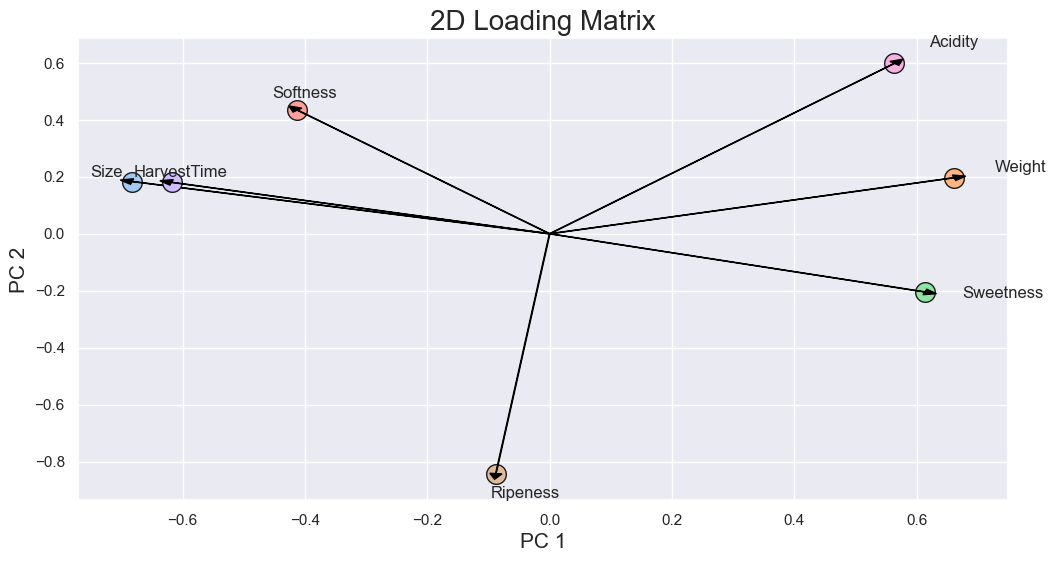

In [76]:
figure = plt.figure(figsize=(12,6))
ax = figure.add_subplot(1,1,1)
ax.set_title("2D Loading Matrix", fontsize=20)
ax.set_xlabel("PC 1", fontsize=15)
ax.set_ylabel("PC 2", fontsize=15)

for i, values in enumerate(features):
    ax.scatter(loadings[i,0], loadings[i,1], s=200, edgecolors='k')
    ax.arrow(
        0, 0, # coordinates of arrow base
        loadings[i,0], # length of the arrow along x
        loadings[i,1], # length of the arrow along y
        color='black', 
        head_width = 0.02,
        head_length = 0.02
        )
    ax.text(loadings[i,0]*1.1, loadings[i,1]*1.1, values)
ax.grid(True)
plt.show()

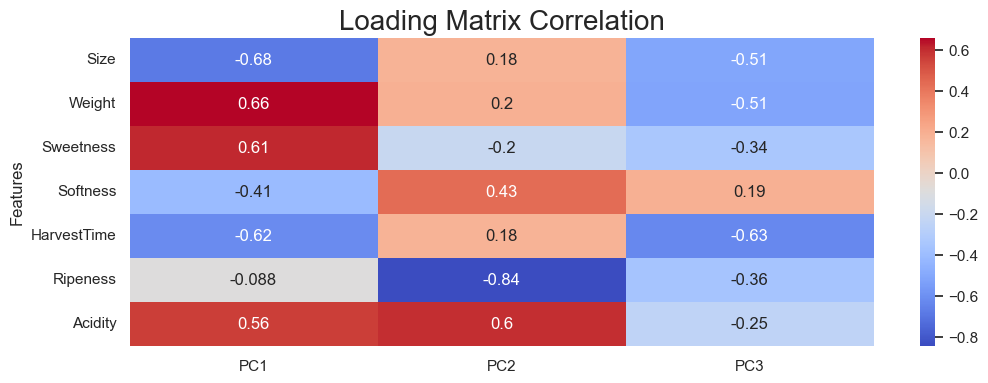

In [77]:
n_pc = 3
plt.figure(figsize=(12,4))
plt.title("Loading Matrix Correlation", fontsize=20)
sns.heatmap(loadings_df.iloc[:,:n_pc], annot=True, cmap="coolwarm")
plt.show()

### **Conclusion:**

#### &emsp; To sum up we can conclude the data related to the good quality is divided in two groups, one part is related to the PC1 given by the variable's acidity, weight, sweetness, and on the other hand the second part is related to the PC2 given by the variable's size, softness, and harvest Time. However, the data related to the bad quality is more related to the PC3 given by the variable ripeness.

#### &emsp; For this study case the analysis allow us to know what the best conditions are to harvest any fruit depends on the general variables that all the fruits have. We can determine the perfect harvest time if only to get fruit, for instance with good acidity and weight or softness and sweetness. 
#### &emsp; In conclusion this analysis is especially useful to have a global knowledge to obtain a product with excellent quality.